In [3]:
#importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#Adjustments for the configuration of plot

%matplotlib inline                               #instructs to draw the plot immediately after current cell
matplotlib.rcParams['figure.figsize'] = (12,8)   # runtime configuration (rc) containing the default plot styles

UsageError: unrecognized arguments: #instructs to draw the plot immediately after current cell


In [43]:
#Loading data

df =pd.read_csv("C:/Users/Admin/Desktop/Movies.csv")

In [44]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [45]:
#identifying missing data

Total = df.isnull().sum().sort_values(ascending = False)
Percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([Total,Percentage],axis=1,keys = ['Total_N','Percentage_N'])
missing_data

Total_N  Percentage_N
budget       2171      0.283125
gross         189      0.024648
rating         77      0.010042
company        17      0.002217
runtime         4      0.000522
score           3      0.000391
votes           3      0.000391
writer          3      0.000391
country         3      0.000391
released        2      0.000261
star            1      0.000130
name            0      0.000000
genre           0      0.000000
year            0      0.000000
director        0      0.000000

In [46]:
#Dropping all null values 

df = df.dropna(how = 'any')
check_miss = df.isnull().sum().sort_values(ascending = False)
check_miss

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [47]:
#Data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [48]:
#changing the data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['released'] = df['released'].astype('str')

df = df.drop(['released'],axis = 1,inplace = False)

In [49]:
#To view the entire data

pd.set_option('display.max_rows',None)

In [50]:
#Sorting by gross column

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [51]:
#Dropping duplicates 

df['company'] = df['company'].drop_duplicates()

<function matplotlib.pyplot.show(close=None, block=None)>

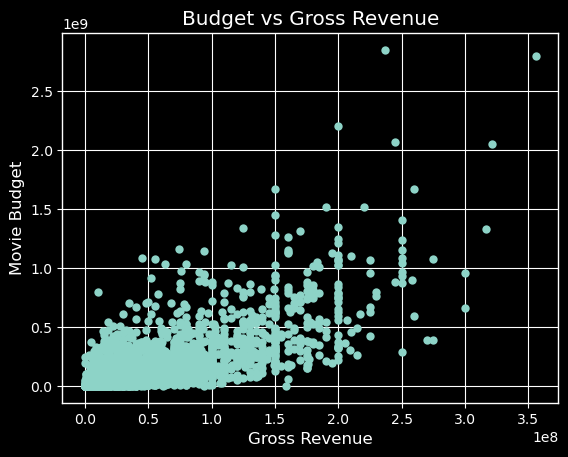

In [88]:
#Scatter plot with budget vs gross

plt.style.use('dark_background')
plt.scatter(x=df['budget'],y =df['gross'],linewidth=0)
plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Budget')
plt.show

In [14]:
df.head()

name rating   genre  year  score  \
5445                                      Avatar  PG-13  Action  2009    7.8   
7445                           Avengers: Endgame  PG-13  Action  2019    8.4   
3045                                     Titanic  PG-13   Drama  1997    7.8   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015    7.8   
7244                      Avengers: Infinity War  PG-13  Action  2018    8.4   

          votes       director              writer               star  \
5445  1100000.0  James Cameron       James Cameron    Sam Worthington   
7445   903000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045  1100000.0  James Cameron       James Cameron  Leonardo DiCaprio   
6663   876000.0    J.J. Abrams     Lawrence Kasdan       Daisy Ridley   
7244   897000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   

            country     budget       gross                company  runtime  
5445  United States  237000000  2847246203  Twentieth Century Fox      162  
7445  United States  356000000  2797501328         Marvel Studios      181  
3045  United States  200000000  2201647264                    NaN      194  
6663  United States  245000000  2069521700              Lucasfilm      138  
7244  United States  321000000  2048359754                    NaN      149

<function matplotlib.pyplot.show(close=None, block=None)>

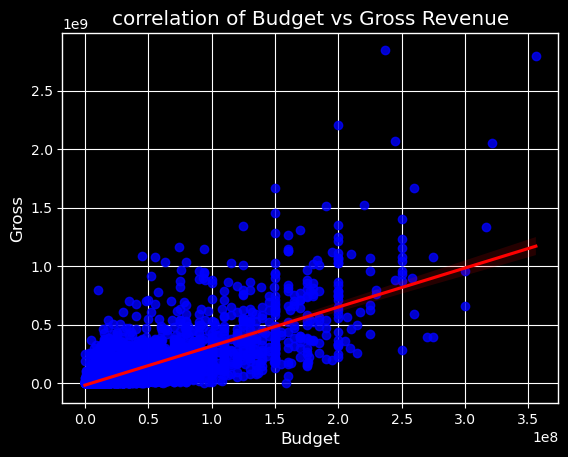

In [96]:
#Plotting using seaborn
plt.style.use('dark_background')
sns.regplot(x='budget',y='gross',
            data=df, scatter_kws={'color':'blue'}, line_kws = {'color':'red'})
plt.title('correlation of Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show
        

<function matplotlib.pyplot.show(close=None, block=None)>

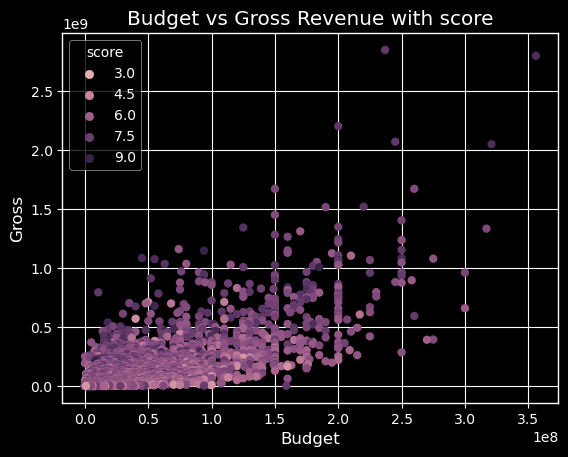

In [95]:
#Budget vs gross in coorelation with score 
plt.style.use('dark_background')
sns.scatterplot(data= df,x=df['budget'],y=df['gross'],hue =df['score'],linewidth=0)

plt.title('Budget vs Gross Revenue with score')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show
               

In [54]:
#identifies correlation

df.corr(method = 'kendall') 

year     score     votes    budget     gross   runtime
year     1.000000  0.039389  0.296512  0.220833  0.239539  0.064824
score    0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254
votes    0.296512  0.350185  1.000000  0.346274  0.553625  0.205344
budget   0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278
gross    0.239539  0.124943  0.553625  0.512057  1.000000  0.176979
runtime  0.064824  0.292254  0.205344  0.231278  0.176979  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

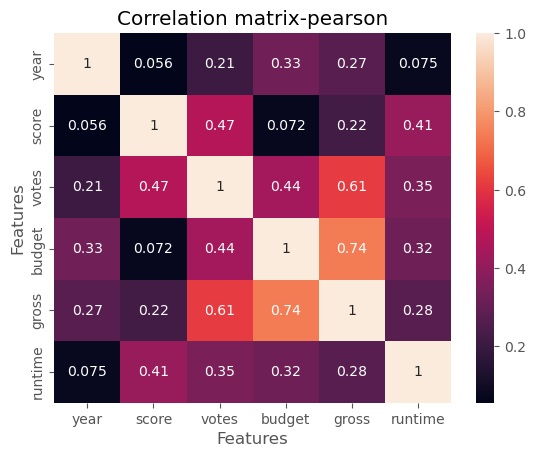

In [28]:
correlation_matrix1 =df.corr(method = 'pearson')


sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation matrix-pearson')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

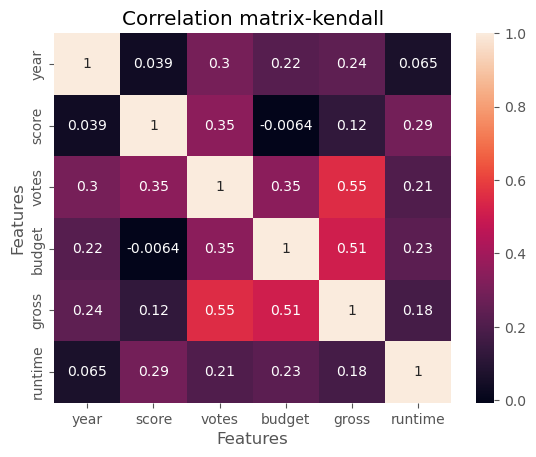

In [56]:
correlation_matrix2 =df.corr(method = 'kendall')

sns.heatmap(correlation_matrix2,annot=True)
plt.title('Correlation matrix-kendall')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show

In [57]:
#casting column with object type as a numeric fot correlation

df_num = df 

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype("category")
        df_num[col_name] = df_num[col_name].cat.codes
df_num

name  rating  genre  year  score      votes  director  writer  star  \
5445   386       5      0  2009    7.8  1100000.0       785    1263  1534   
7445   388       5      0  2019    8.4   903000.0       105     513  1470   
3045  4909       5      6  1997    7.8  1100000.0       785    1263  1073   
6663  3643       5      0  2015    7.8   876000.0       768    1806   356   
7244   389       5      0  2018    8.4   897000.0       105     513  1470   
7480  4388       4      2  2019    6.9   222000.0      1012    1361   457   
6653  2117       5      0  2015    7.0   593000.0       335    2523   293   
6043  3878       5      0  2012    8.0  1300000.0      1060    1646  1470   
6646  1541       5      0  2015    7.1   370000.0       809     481  1785   
7494  1530       4      2  2019    6.8   148000.0       277    1383  1036   
6644   387       5      0  2015    7.3   777000.0      1060    1646  1470   
7247   567       5      0  2018    7.3   661000.0      1716    2687   260   
5845  1731       5      1  2011    8.1   790000.0       452    2862   379   
7075  3644       5      0  2017    7.0   581000.0      1589    2487   356   
7271  2118       5      0  2018    6.2   277000.0       764     777   293   
6262  1529       4      2  2013    7.4   585000.0       277    1383  1036   
7072   477       4      7  2017    7.1   283000.0       155    2822   533   
7281  1966       4      2  2018    7.6   263000.0       193     327   344   
7055  4119       5      0  2017    6.6   214000.0       567    1013  1785   
6244  2014       5      0  2013    7.1   779000.0      1767     837  1470   
6688  2545       4      2  2015    6.4   218000.0      1144     362  1542   
6846   750       5      0  2016    7.8   694000.0       105     513   283   
7250   343       5      0  2018    6.9   404000.0       809     699   759   
4245  4407       5      0  2003    8.9  1700000.0      1520    1238   497   
7458  3595       5      0  2019    7.5   359000.0      1019     479  1738   
7456   755       5      0  2019    6.8   478000.0        96     182   208   
5878  4950       5      0  2011    6.2   390000.0      1302     886  1610   
6059  3498       5      0  2012    7.7   642000.0      1732    2221   373   
6494  4949       5      0  2014    5.6   302000.0      1302     886  1161   
2448  4388       1      2  1994    8.5   970000.0      1685    1206  1187   
6047  4048       5      0  2012    8.4  1600000.0       317    1606   297   
7463  3640       5      0  2019    6.5   394000.0       768     489   356   
7450  2091       6      5  2019    8.4  1000000.0      1937    2998   844   
7488  4936       1      2  2019    7.7   217000.0      1052    1525  1735   
5685  4935       1      2  2010    8.2   776000.0      1162    1525  1735   
4852  2985       5      0  2006    7.3   668000.0       674    2927   889   
6869  3260       5      0  2016    7.8   572000.0       615     492   555   
7481   206       4      1  2019    6.9   239000.0       705    1468  1812   
5860  2988       5      0  2011    6.6   492000.0      1635    2927   889   
7140  1102       4      2  2017    6.3   119000.0      1144     524  1644   
2245  2115       5      0  1993    8.1   894000.0      1859    2070  1529   
6908  1411       4      2  2016    7.3   250000.0        81     153   512   
3451  3637       4      0  1999    6.5   748000.0       653    1046   550   
5667   215       4      1  2010    6.4   392000.0      1918    1849  1216   
6863  5329       4      2  2016    8.0   450000.0       239     390   613   
6045  4240       5      1  2012    7.8   773000.0      1520     967  1166   
3843  1736       4      1  2001    7.6   685000.0       280    1236   379   
5243  4047       5      0  2008    9.0  2400000.0       317    1606   297   
6311  1101       4      2  2013    7.3   377000.0      1556     524  1644   
6905  4322       4      1  2016    7.4   264000.0      1012    1671  1300   
7051  2107       5      0  2017    6.9   336000.0       778     479   472   
64

<function matplotlib.pyplot.show(close=None, block=None)>

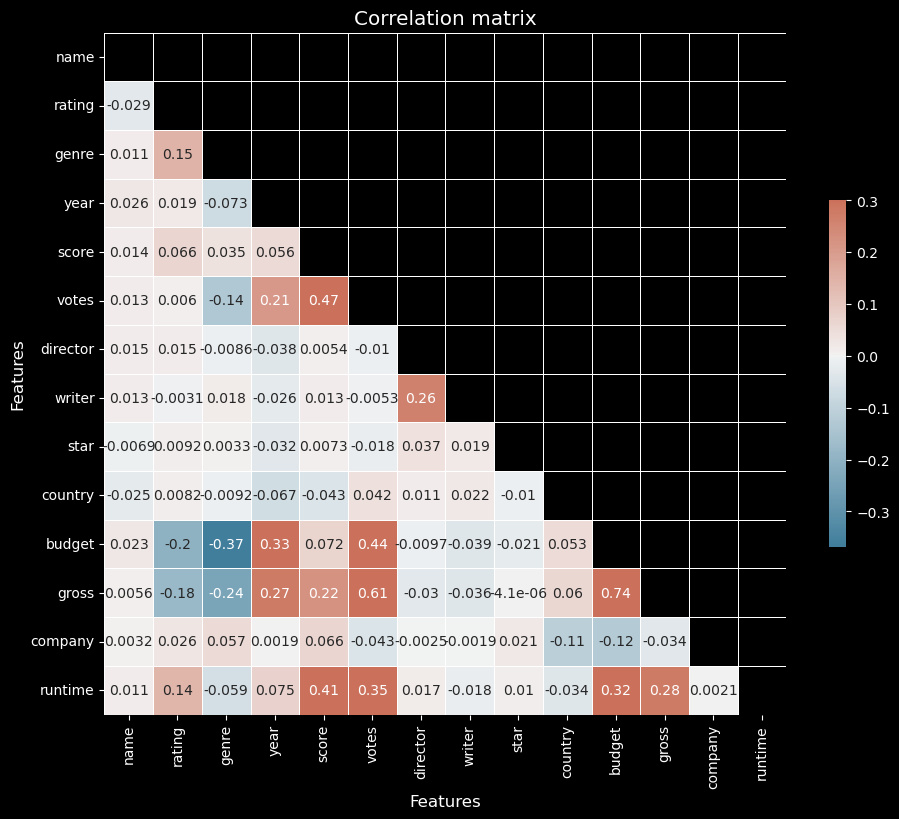

In [94]:
correlation_matrix3 =df_num.corr(method = 'pearson')

mask = np.triu(np.ones_like(correlation_matrix3, dtype=bool))
fig, ax = plt.subplots(figsize = (11,9))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(correlation_matrix3,annot=True,mask=mask,cmap=cmap
           ,vmax=.3,center=0,square=True,linewidths=0.5,
           cbar_kws={'shrink':0.5})
plt.title('Correlation matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show

In [63]:
df_num.corr()

name    rating     genre      year     score     votes  \
name      1.000000 -0.029234  0.010996  0.025542  0.014450  0.012615   
rating   -0.029234  1.000000  0.147796  0.019499  0.065983  0.006031   
genre     0.010996  0.147796  1.000000 -0.073167  0.035106 -0.135990   
year      0.025542  0.019499 -0.073167  1.000000  0.056386  0.206021   
score     0.014450  0.065983  0.035106  0.056386  1.000000  0.474256   
votes     0.012615  0.006031 -0.135990  0.206021  0.474256  1.000000   
director  0.015246  0.014656 -0.008553 -0.038354  0.005413 -0.010376   
writer    0.012880 -0.003149  0.017578 -0.025908  0.012843 -0.005316   
star     -0.006882  0.009196  0.003341 -0.032157  0.007296 -0.017638   
country  -0.025490  0.008230 -0.009164 -0.066748 -0.043051  0.041551   
budget    0.023392 -0.203946 -0.368523  0.327722  0.072001  0.439675   
gross     0.005639 -0.181906 -0.244101  0.274321  0.222556  0.614751   
company   0.003204  0.026471  0.056611  0.001906  0.065921 -0.043005   
runtime   0.010850  0.140792 -0.059237  0.075077  0.414068  0.352303   

          director    writer      star   country    budget     gross  \
name      0.015246  0.012880 -0.006882 -0.025490  0.023392  0.005639   
rating    0.014656 -0.003149  0.009196  0.008230 -0.203946 -0.181906   
genre    -0.008553  0.017578  0.003341 -0.009164 -0.368523 -0.244101   
year     -0.038354 -0.025908 -0.032157 -0.066748  0.327722  0.274321   
score     0.005413  0.012843  0.007296 -0.043051  0.072001  0.222556   
votes    -0.010376 -0.005316 -0.017638  0.041551  0.439675  0.614751   
director  1.000000  0.261735  0.036593  0.011133 -0.009662 -0.029560   
writer    0.261735  1.000000  0.018520  0.022488 -0.039466 -0.035885   
star      0.036593  0.018520  1.000000 -0.009990 -0.021473 -0.000004   
country   0.011133  0.022488 -0.009990  1.000000  0.052977  0.060078   
budget   -0.009662 -0.039466 -0.021473  0.052977  1.000000  0.740247   
gross    -0.029560 -0.035885 -0.000004  0.060078  0.740247  1.000000   
company  -0.002454 -0.001869  0.021169 -0.110035 -0.124867 -0.033677   
runtime   0.017433 -0.017561  0.010108 -0.034477  0.318695  0.275796   

           company   runtime  
name      0.003204  0.010850  
rating    0.026471  0.140792  
genre     0.056611 -0.059237  
year      0.001906  0.075077  
score     0.065921  0.414068  
votes    -0.043005  0.352303  
director -0.002454  0.017433  
writer   -0.001869 -0.017561  
star      0.021169  0.010108  
country  -0.110035 -0.034477  
budget   -0.124867  0.318695  
gross    -0.033677  0.275796  
company   1.000000  0.002134  
runtime   0.002134  1.000000

In [69]:
#restructuring columns & rows

correlation_mat = df_num.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name      1.000000
      rating   -0.029234
      genre     0.010996
      year      0.025542
      score     0.014450
dtype: float64

In [66]:
#correlated pairs are arranged
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
gross     genre      -0.244101
genre     gross      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
gross     rating     -0.181906
rating    gross      -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
budget    company    -0.124867
company   budget     -0.124867
          country    -0.110035
country   company    -0.110035
year      genre      -0.073167
genre     year       -0.073167
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
score     country    -0.043051
country   score      -0.043051
company   votes      -0.043005
votes     company    -0.043005
writer    budget     -0.039466
budget    writer     -0.039466
year      director   -0.038354
director  year       -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
runtime   country    -0.034477
country   runtime    -0.034477
company 

In [68]:
#identifying high correlation

high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation.head()

gross   votes     0.614751
votes   gross     0.614751
gross   budget    0.740247
budget  gross     0.740247
name    name      1.000000
dtype: float64

In [ ]:
#This shows that votes & budget have a higher coorelation with gross